In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
visa_df=pd.read_csv(r"C:\Users\kisho\Documents\data set\Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
cat=visa_df.select_dtypes(include="object").columns
num=visa_df.select_dtypes(exclude="object").columns
cat,num

(Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
        'requires_job_training', 'region_of_employment', 'unit_of_wage',
        'full_time_position', 'case_status'],
       dtype='object'),
 Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object'))

**Bivariate analysis**

- we already seen uni variate analysis

- weperform the catagorical column analysis

     - frequency table(value counts)

     - bar chart

     - relative frequency table(value counts normalized form)

     - pie chart

- we performed numerical column analysis

      - histogram

      - box plot

      - distribution plot

      - outlier analysis

      - filling the outlier

- now we will do catagorical-catagorical analyisis

- numerical-numerical analysis

- catagorical to numerical

- numerical-to catagorical

**catagorical-to-catagorical**

- lets consider two columns

- continent

- case status

In [15]:
#continents
visa_df["continent"].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [16]:
visa_df["case_status"].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**task**

- find the certified observation continent wise

- find the deniedobservation continent wise

In [ ]:
#step_1:make the 1st condition continnt==asia
#step_2:make the 2nd condition,case_status==certified
#step_3:make the 3rd condition:con1 &con2
#step_4:then retrive the dataframe and take the count

In [53]:
visa_df["continent"].unique()
visa_df["continent"].value_counts().keys()

Index(['Asia', 'Europe', 'North America', 'South America', 'Africa',
       'Oceania'],
      dtype='object', name='continent')

In [60]:
import os
root=os.getcwd()
folder="bivariant_analysis_bank_data"
dir=os.path.join(root+"\\"+"bank_data",folder)
os.makedirs(dir)

In [62]:
root=os.getcwd()
folder="certified and denied df"
dir=os.path.join(root+"\\"+"bank_data"+"\\"+"bivariant_analysis_bank_data",folder)#data frame saved in this location
os.makedirs(dir)

In [22]:
#for asia 
con1=visa_df["continent"]=="Asia"
con2=visa_df["case_status"]=="Certified"
con3=con1&con2
len(visa_df[con3])

11012

In [33]:
l=[]
for i in visa_df["continent"].unique():
    
    con1=visa_df["continent"]==i
    con2=visa_df["case_status"]=="Certified"
    con3=con1&con2
    l.append(len(visa_df[con3]))
l
certified_df=pd.DataFrame(zip(visa_df["continent"].unique(),l),columns=["continents","certified"])
#certified_df.to_csv(f"{dir}\\certified_df.csv")
certified_df

,continents,certified
0,Asia,11012
1,Africa,397
2,North America,2037
3,Europe,2957
4,South America,493
5,Oceania,122


In [29]:
con1=visa_df["continent"]=="Asia"
con2=visa_df["case_status"]=="Denied"
con3=con1&con2
len(visa_df[con3])

5849

In [34]:
l=[]
for i in visa_df["continent"].unique():
    
    con1=visa_df["continent"]==i
    con2=visa_df["case_status"]=="Denied"
    con3=con1&con2
    l.append(len(visa_df[con3]))
l
denied_df=pd.DataFrame(zip(visa_df["continent"].unique(),l),columns=["continents","Denied"])
denied_df

,continents,Denied
0,Asia,5849
1,Africa,154
2,North America,1255
3,Europe,775
4,South America,359
5,Oceania,70


**all in one frame**

In [64]:
certified_list,denied_list=[],[]
for i in visa_df["continent"].unique():
    
    con1=visa_df["continent"]==i
    con2=visa_df["case_status"]=="Certified"
    con3=visa_df["case_status"]=="Denied"
    certi_con=con1&con2
    denied_con=con1&con3
    certified_list.append(len(visa_df[certi_con]))
    denied_list.append(len(visa_df[denied_con]))
certified_denied_df=pd.DataFrame(zip(certified_list,denied_list),columns=["certified","denied"],index=visa_df["continent"].unique())
#certified_denied_df.to_csv(f"{dir}\\cert_denied_df.csv")
certified_denied_df

,certified,denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**cross tab**

- theabovedataframe we can make by using **cross tab**
    
- it is available in pandas
    
    - it takes 2 argument
    
    - 1.index
    
    - 2.column
    
- in above dataframe index olumn is : **continents**
- in above dataframe data column is : **case_status**

In [56]:
df4=pd.crosstab(visa_df["continent"],visa_df["case_status"])
df4

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

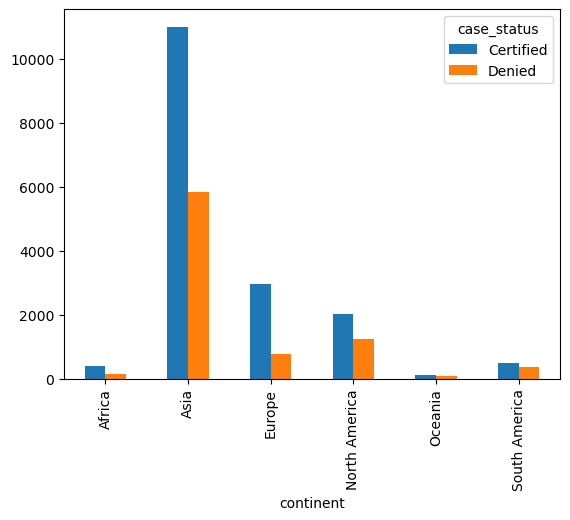

In [57]:
df4.plot(kind="bar")

**multivariate analysis**
- education
- continent
- case status
- we already know from asia there 11k accepted visa
- in that i want further breakdown based on education
- here also pd.crosstab
- 1st fix ur indexof any one out of 3 column
- then keep 2 column in a list and pass as data column

In [58]:
df5=pd.crosstab(visa_df["continent"],[visa_df["education_of_employee"],visa_df["case_status"]])
df5

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent'>

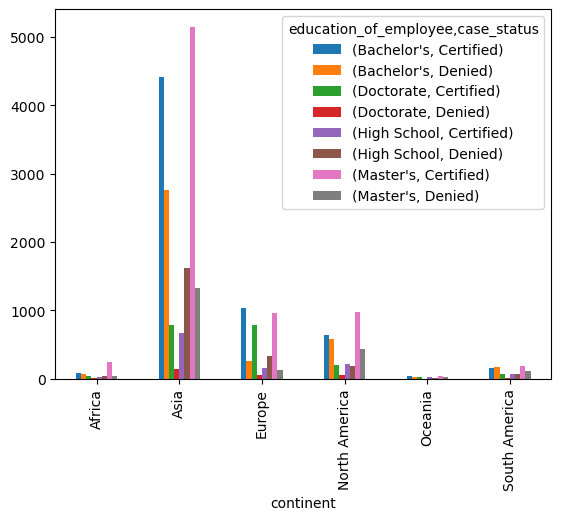

In [59]:
df5.plot(kind="bar")

In [66]:
visa_df["continent"]

0          Asia
1          Asia
2          Asia
3          Asia
4        Africa
          ...  
25475      Asia
25476      Asia
25477      Asia
25478      Asia
25479      Asia
Name: continent, Length: 25480, dtype: object

**numerical vs numerical**

- to understand numerical columns relation we need to plot scatter plots
- scatter plot gives the relation between two numrical columns
- bar chart ,pie chart,histogram,scatter plots
- scatter plot under matplotlib package
- **plt.scatter**

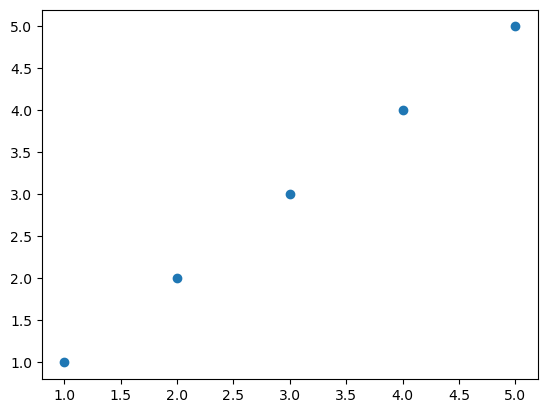

In [7]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)

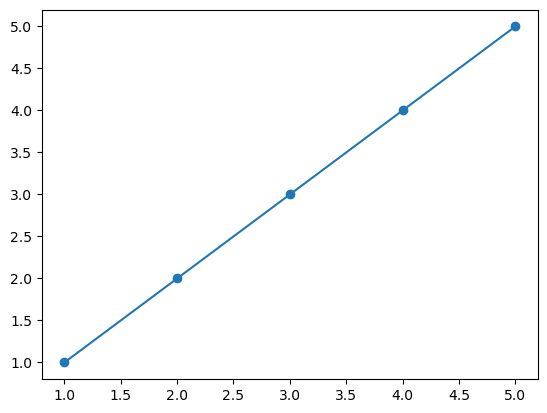

In [8]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

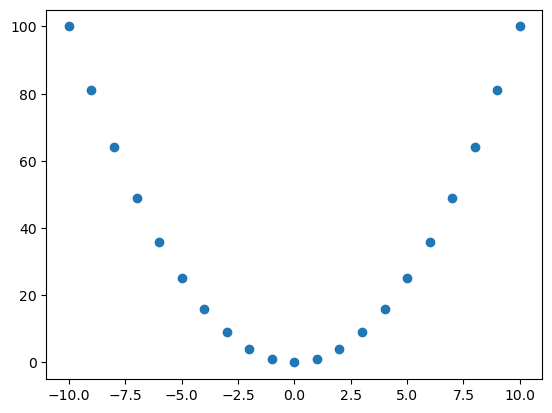

In [10]:
x=[i for i in range(-10,11)]
y=[i*i for i in x]
plt.scatter(x,y)

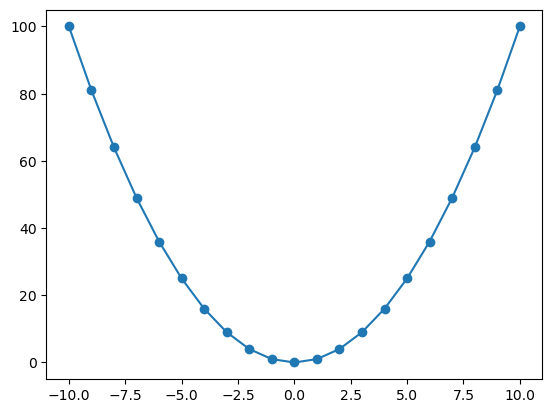

In [11]:
x=[i for i in range(-10,11)]
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [ ]:
#step_1:readone numerical column
#step_2:read another numerical column
#apply the scatter plot

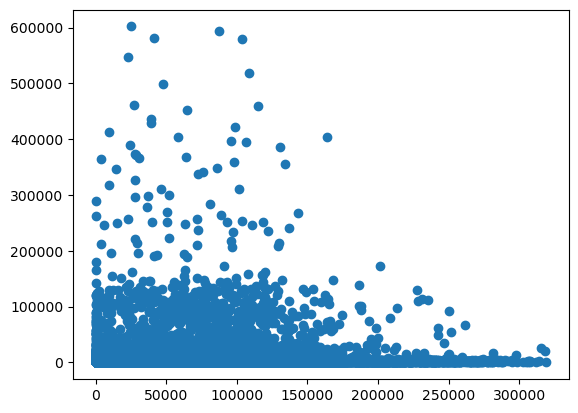

In [13]:
col1=visa_df["prevailing_wage"]
col2=visa_df["no_of_employees"]
plt.scatter(col1,col2)

In [14]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

Text(0, 0.5, 'prevailing_wage')

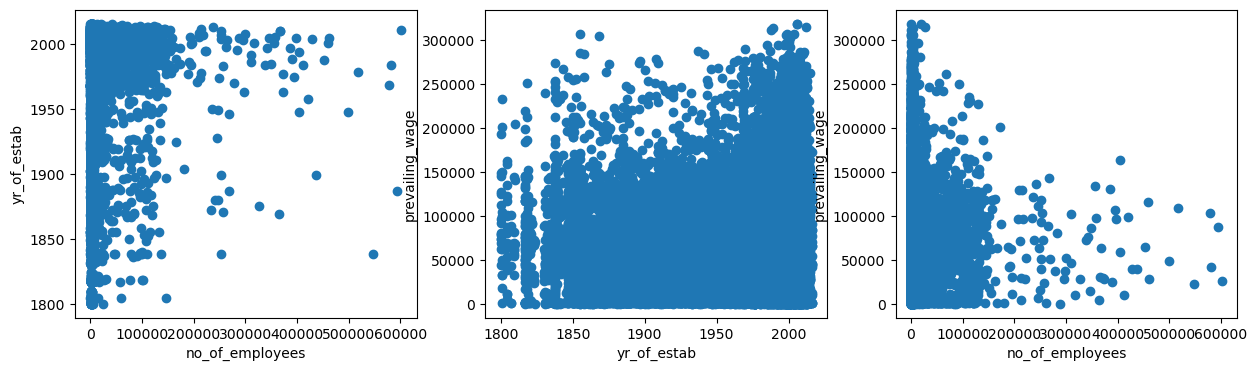

In [16]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
plt.figure(figsize=(15,4))
plt.subplot(1,3,1).scatter(col1,col2)
plt.xlabel('no_of_employees')
plt.ylabel('yr_of_estab')
plt.subplot(1,3,2).scatter(col2,col3)
plt.xlabel('yr_of_estab')
plt.ylabel('prevailing_wage')
plt.subplot(1,3,3).scatter(col1,col3)
plt.xlabel('no_of_employees')
plt.ylabel('prevailing_wage')

- implemnt the covariance function
- covariance vs correlation
- covariance will tell about the columns have relation or not
- correlation will explain about relation status
    - positive relation
    - negetve relation
    - no relation
- correlation tells about hoe much relation between 2 variables
- it denotes with r
- r varies from -1 to 1
- 1 to 0:indicates negetive relation quantity
- 0 to 1:indicate positive relation quantity
- o indicates no relation

**method name is:corr**

In [18]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


In [20]:
import seaborn as sns

**hit map**
- it an important visualization method,to show the matrix form of values.
- it is under sea born package
- in every matrix we have highestvalues and lowest values available
- heat map will give colour visualization
- also it provides colour bar,which colour indicates which value.


<Axes: >

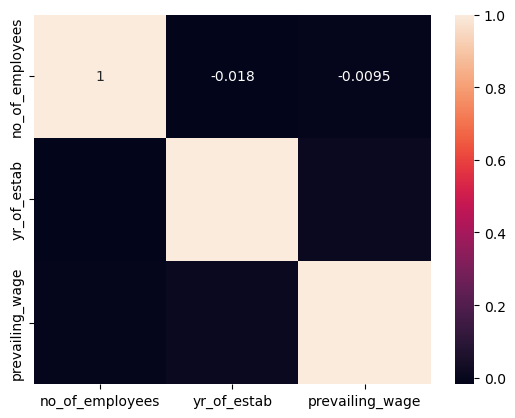

In [22]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True)

<Axes: >

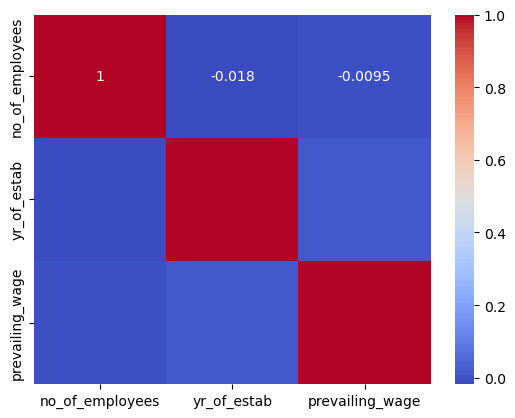

In [24]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True,cmap='coolwarm')

- by seeing the graphs we might not say the relation status
- it is best practice get the percentae of relation using correlation.
- all 3 columns having approxmatly zero percentage of relation.
- which indicates all the column having no relation.
- no relation means independent each other. 
- in ml we expect the input column should be independent each other.
- corr method gives matrix view
- we have 3 columns 3*3 total 9 fields.
- if a data has 20 columns then 20*20 total 400 field.
- thats why alwys go with heatmap visualization